In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
train_dir = r"C:\Users\onata\Downloads\cats_and_dogs_small\train"
validation_dir = r"C:\Users\onata\Downloads\cats_and_dogs_small\validation"
test_dir = r"C:\Users\onata\Downloads\cats_and_dogs_small\test"

# Data Preprocessing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#Generating batches of tensor image data

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size= (150,150), batch_size= 20, class_mode="binary"
                                                   )

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size = 20, class_mode= 'binary' )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# CNN ARCHITECTURE

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [10]:
model = keras.models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 128)     

In [13]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer= optimizers.RMSprop(lr = 1e-4),
             metrics=['acc'])

In [14]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20,validation_data=validation_generator, validation_steps=50)

C:\Users\onata\AppData\Local\Temp/ipykernel_7512/3420509317.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20,validation_data=validation_generator, validation_steps=50)


Epoch 1/20
100/100 [==============================] - 33s 325ms/step - loss: 0.6882 - acc: 0.5355 - val_loss: 0.6913 - val_acc: 0.5290
Epoch 2/20
100/100 [==============================] - 27s 267ms/step - loss: 0.6578 - acc: 0.6170 - val_loss: 0.6643 - val_acc: 0.5850
Epoch 3/20
100/100 [==============================] - 27s 272ms/step - loss: 0.6140 - acc: 0.6625 - val_loss: 0.6486 - val_acc: 0.6180
Epoch 4/20
100/100 [==============================] - 27s 268ms/step - loss: 0.5645 - acc: 0.7130 - val_loss: 0.5801 - val_acc: 0.6830
Epoch 5/20
100/100 [==============================] - 26s 262ms/step - loss: 0.5436 - acc: 0.7325 - val_loss: 0.6003 - val_acc: 0.6670
Epoch 6/20
100/100 [==============================] - 28s 283ms/step - loss: 0.5182 - acc: 0.7365 - val_loss: 0.5534 - val_acc: 0.7100
Epoch 7/20
100/100 [==============================] - 27s 267ms/step - loss: 0.4921 - acc: 0.7545 - val_loss: 0.5409 - val_acc: 0.7220
Epoch 8/20
100/100 [==============================] - 2

<function matplotlib.pyplot.show(close=None, block=None)>

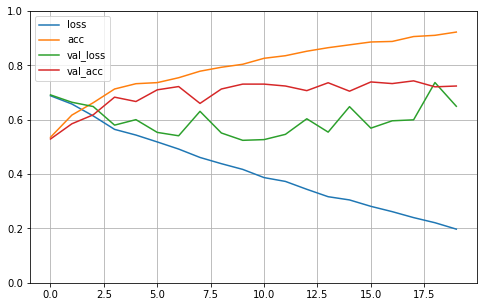

In [15]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show

In [16]:
#to save the existing model
model.save("model.h5")

In [17]:
from tensorflow.keras import backend as K

K.clear_session()

del model

In [18]:
#dummy data can be created using scaled, shear or rotation

# AUGMENTATION

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size= (150,150), batch_size= 32, class_mode="binary"
                                                   )

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size = 32, class_mode= 'binary' )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
model = keras.models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #this will deactivate 50 percent of neurons during each epoch.
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss = 'binary_crossentropy', optimizer= optimizers.RMSprop(learning_rate = 1e-4),
             metrics=['acc'])

In [29]:
history = model.fit_generator(train_generator, steps_per_epoch=40, epochs=100,validation_data=validation_generator, validation_steps=50)

Epoch 1/100


C:\Users\onata\AppData\Local\Temp/ipykernel_7512/3138077111.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=40, epochs=100,validation_data=validation_generator, validation_steps=50)


40/40 [==============================] - 18s 457ms/step - loss: 0.5997 - acc: 0.6641 - val_loss: 0.6182 - val_acc: 0.6570
Epoch 2/100
40/40 [==============================] - 15s 376ms/step - loss: 0.6129 - acc: 0.6641
Epoch 3/100
40/40 [==============================] - 15s 381ms/step - loss: 0.6007 - acc: 0.6687
Epoch 4/100
40/40 [==============================] - 15s 377ms/step - loss: 0.6052 - acc: 0.6733
Epoch 5/100
40/40 [==============================] - 16s 387ms/step - loss: 0.5892 - acc: 0.6946
Epoch 6/100
40/40 [==============================] - 16s 401ms/step - loss: 0.5919 - acc: 0.6946
Epoch 7/100
40/40 [==============================] - 15s 377ms/step - loss: 0.5869 - acc: 0.6867
Epoch 8/100
40/40 [==============================] - 15s 374ms/step - loss: 0.5841 - acc: 0.6946
Epoch 9/100
40/40 [==============================] - 15s 375ms/step - loss: 0.5713 - acc: 0.6875
Epoch 10/100
40/40 [==============================] - 15s 375ms/step - loss: 0.5854 - acc: 0.6804
Epoc

In [31]:
model.save("project_cnn.h5")

In [33]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show

ValueError: All arrays must be of the same length